In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
from collections import OrderedDict 
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Normalize the files to use i.e. same number of lines
f = open("126015.txt", "r")
book1 = f.read()
book1_lines = book1.split('\n')
random.shuffle(book1_lines)
book1_part1 = book1_lines[:len(book1_lines)//2]
book1_part2 = book1_lines[len(book1_lines)//2:]
f.close()

wf = open("126015_1.txt", "w+")
wf.write('\n'.join(book1_part1))
wf.close()

wf = open("126015_2.txt", "w+")
wf.write('\n'.join(book1_part2))
wf.close()

In [4]:
# Normalize second file.
f = open("524590.txt", "r")
book2 = f.read()
book2_lines = book2.split('\n')
random.shuffle(book2_lines)
book2_normalized = book2_lines[:len(book1_lines)//2]
f.close()

wf = open("524590_1.txt", "w+")
wf.write('\n'.join(book2_normalized))
wf.close()

In [5]:
def get_tokens(path):
    f = open(path, "r")
    book1 = f.read()
    
    # Tokenize based on NLTK and regexp split criteria.
    book1_words = word_tokenize(book1)
    tokenizer = RegexpTokenizer(r'\w+')
    book1_words = tokenizer.tokenize(" ".join(book1_words))
    
    stop_words = set(stopwords.words('english')) 
    
    # Remove punctuation.
    book1_words = [x.lower() for x in book1_words if not x in string.punctuation]
    # Remove stop words.
    book1_words = [x for x in book1_words if not x in stop_words]
    # Stem words.
    ps = PorterStemmer()
    book1_words = [ps.stem(x) for x in book1_words]
    
    return book1_words

In [6]:
# 126015 - Perfect Obedience A Bride’s Vow
# Genre: Historical Romance Fiction
book1_tokens = get_tokens("126015_1.txt")
# 126015 - Perfect Obedience A Bride’s Vow
# Genre: Historical Romance Fiction
book2_tokens = get_tokens("126015_2.txt")
# 524590 - 48 Hours To Die
# Genre: Thriller Fiction
book3_tokens = get_tokens("524590_1.txt")

In [7]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /Users/luiszul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/luiszul/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [9]:
lemmatized_book1_tokens = lemmatize_tokens(book1_tokens)
lemmatized_book2_tokens = lemmatize_tokens(book2_tokens)
lemmatized_book3_tokens = lemmatize_tokens(book3_tokens)

In [10]:
def convert_to_pdf(values):
    pdf = {}
    for value in values:
        if pdf.get(value) is None:
            pdf[value] = 0
        pdf[value] += 1
    return pdf

In [11]:
pdf_tokens1 = convert_to_pdf(lemmatized_book1_tokens)
pdf_tokens2 = convert_to_pdf(lemmatized_book2_tokens)
pdf_tokens3 = convert_to_pdf(lemmatized_book3_tokens)

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def get_polarity_scores(tokens):
    polarity_scores = []
    for token in tokens:
        polarity_scores.append(sid.polarity_scores(token)['compound'])
    return polarity_scores

/Users/luiszul/opt/anaconda3/envs/python3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
polarity_scores_1 = get_polarity_scores(lemmatized_book1_tokens)
polarity_scores_2 = get_polarity_scores(lemmatized_book2_tokens)
polarity_scores_3 = get_polarity_scores(lemmatized_book3_tokens)

In [14]:
pdf1 = convert_to_pdf(polarity_scores_1)
pdf2 = convert_to_pdf(polarity_scores_2)
pdf3 = convert_to_pdf(polarity_scores_3)

In [15]:
pdf1_sorted = pdf1.items()
pdf1_sorted = sorted(pdf1_sorted)

pdf1_x = [p[0] for p in pdf1_sorted]
pdf1_y = [p[1] for p in pdf1_sorted]
pdf1_y = [sum(pdf1_y[:i+1]) for i in range(len(pdf1_y))]
pdf1_y = [p / max(pdf1_y) for p in pdf1_y]

In [16]:
pdf2_sorted = pdf2.items()
pdf2_sorted = sorted(pdf2_sorted)

pdf2_x = [p[0] for p in pdf2_sorted]
pdf2_y = [p[1] for p in pdf2_sorted]
pdf2_y = [sum(pdf2_y[:i+1]) for i in range(len(pdf2_y))]
pdf2_y = [p / max(pdf2_y) for p in pdf2_y]

In [17]:
pdf3_sorted = pdf3.items()
pdf3_sorted = sorted(pdf3_sorted)

pdf3_x = [p[0] for p in pdf3_sorted]
pdf3_y = [p[1] for p in pdf3_sorted]
pdf3_y = [sum(pdf3_y[:i+1]) for i in range(len(pdf3_y))]
pdf3_y = [p / max(pdf3_y) for p in pdf3_y]

<IPython.core.display.Javascript object>


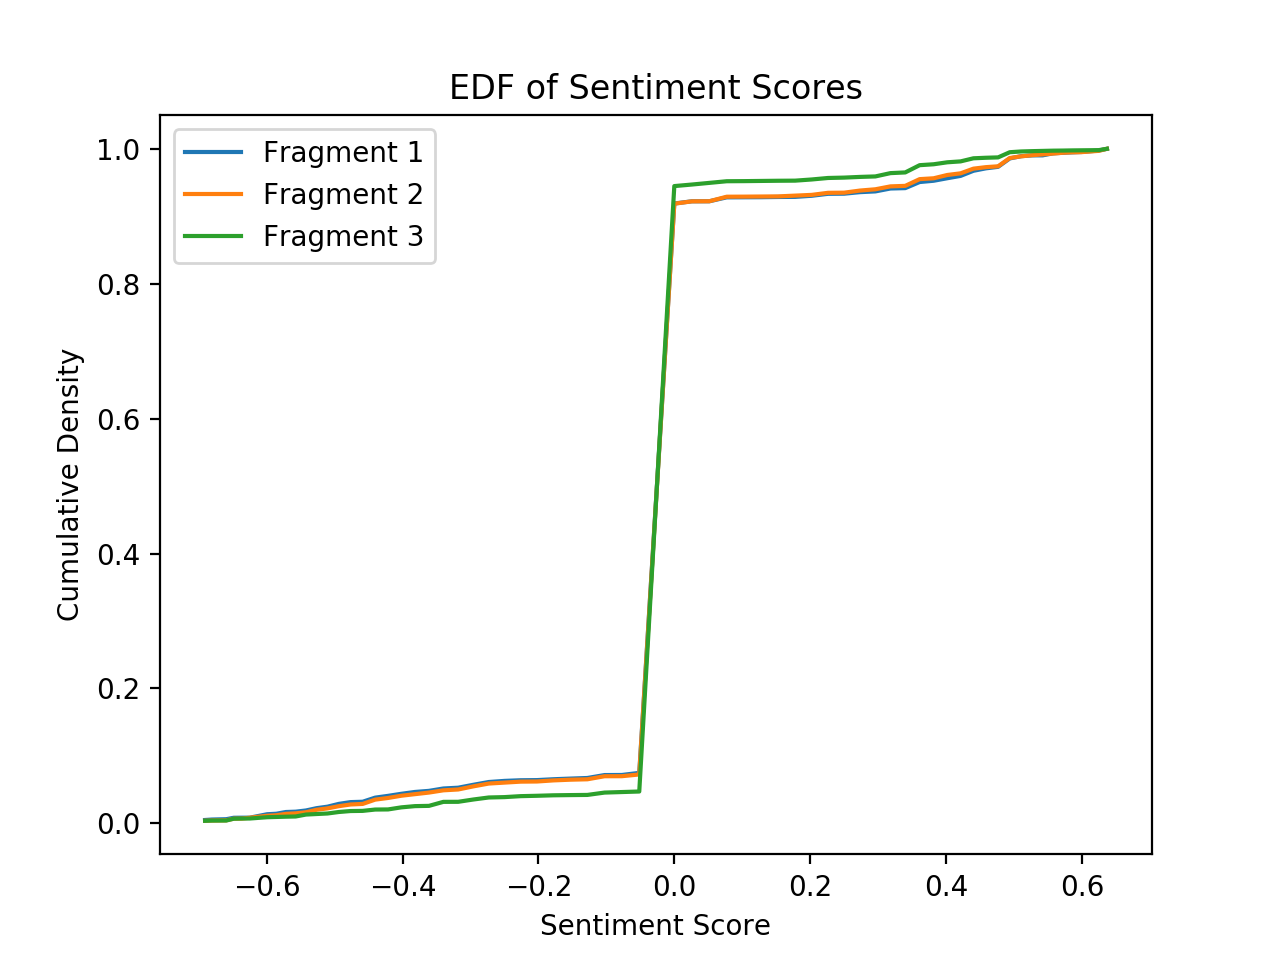

In [18]:
plt.plot(pdf1_x, pdf1_y, label="Fragment 1")
plt.plot(pdf2_x, pdf2_y, label="Fragment 2")
plt.plot(pdf3_x, pdf3_y, label="Fragment 3")
plt.title("EDF of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Cumulative Density")
plt.legend()
plt.show()

In [19]:
from scipy.stats import ks_2samp

In [22]:
results_df = {
    "0": [ks_2samp(pdf1_y, pdf1_y).pvalue, ks_2samp(pdf1_y, pdf2_y).pvalue, ks_2samp(pdf1_y, pdf3_y).pvalue],
    "1": [ks_2samp(pdf2_y, pdf1_y).pvalue, ks_2samp(pdf2_y, pdf2_y).pvalue, ks_2samp(pdf2_y, pdf3_y).pvalue],
    "2": [ks_2samp(pdf3_y, pdf1_y).pvalue, ks_2samp(pdf3_y, pdf2_y).pvalue, ks_2samp(pdf3_y, pdf3_y).pvalue],
}

In [24]:
import pandas as pd

In [25]:
pd.DataFrame(results_df)

,0,1,2
0,1.000000,0.999049,0.044259
1,0.999049,1.000000,0.090228
2,0.044259,0.090228,1.000000
